Comprobaciones previas del collab

In [2]:
#Observo el entorno
!nvidia-smi

Tue Feb 18 08:00:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
#instalo ultralytics en el collab
!pip install ultralytics

In [4]:
#hago los check de la maquina virtual para ver su potencia
import ultralytics
ultralytics.checks()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/112.6 GB disk)


In [5]:
#importo yolo
from ultralytics import YOLO
from IPython.display import Image

In [6]:
#importo la libreria
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KwEwzKgU4TML4BZUrgNJ")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [7]:
#Observo donde ha instalado el dataset
dataset.location

'/content/Facial-Emotion-Dataset--3'

In [16]:
#Entreno el modelo
!!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov8m.pt" epochs=100 imgsz=640 lr0=0.01 augment=True optimizer=Adam


['Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)',
 '\x1b\x1bengine/trainer: \x1btask=detect, mode=train, model=yolov8m.pt, data=/content/Facial-Emotion-Dataset--3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

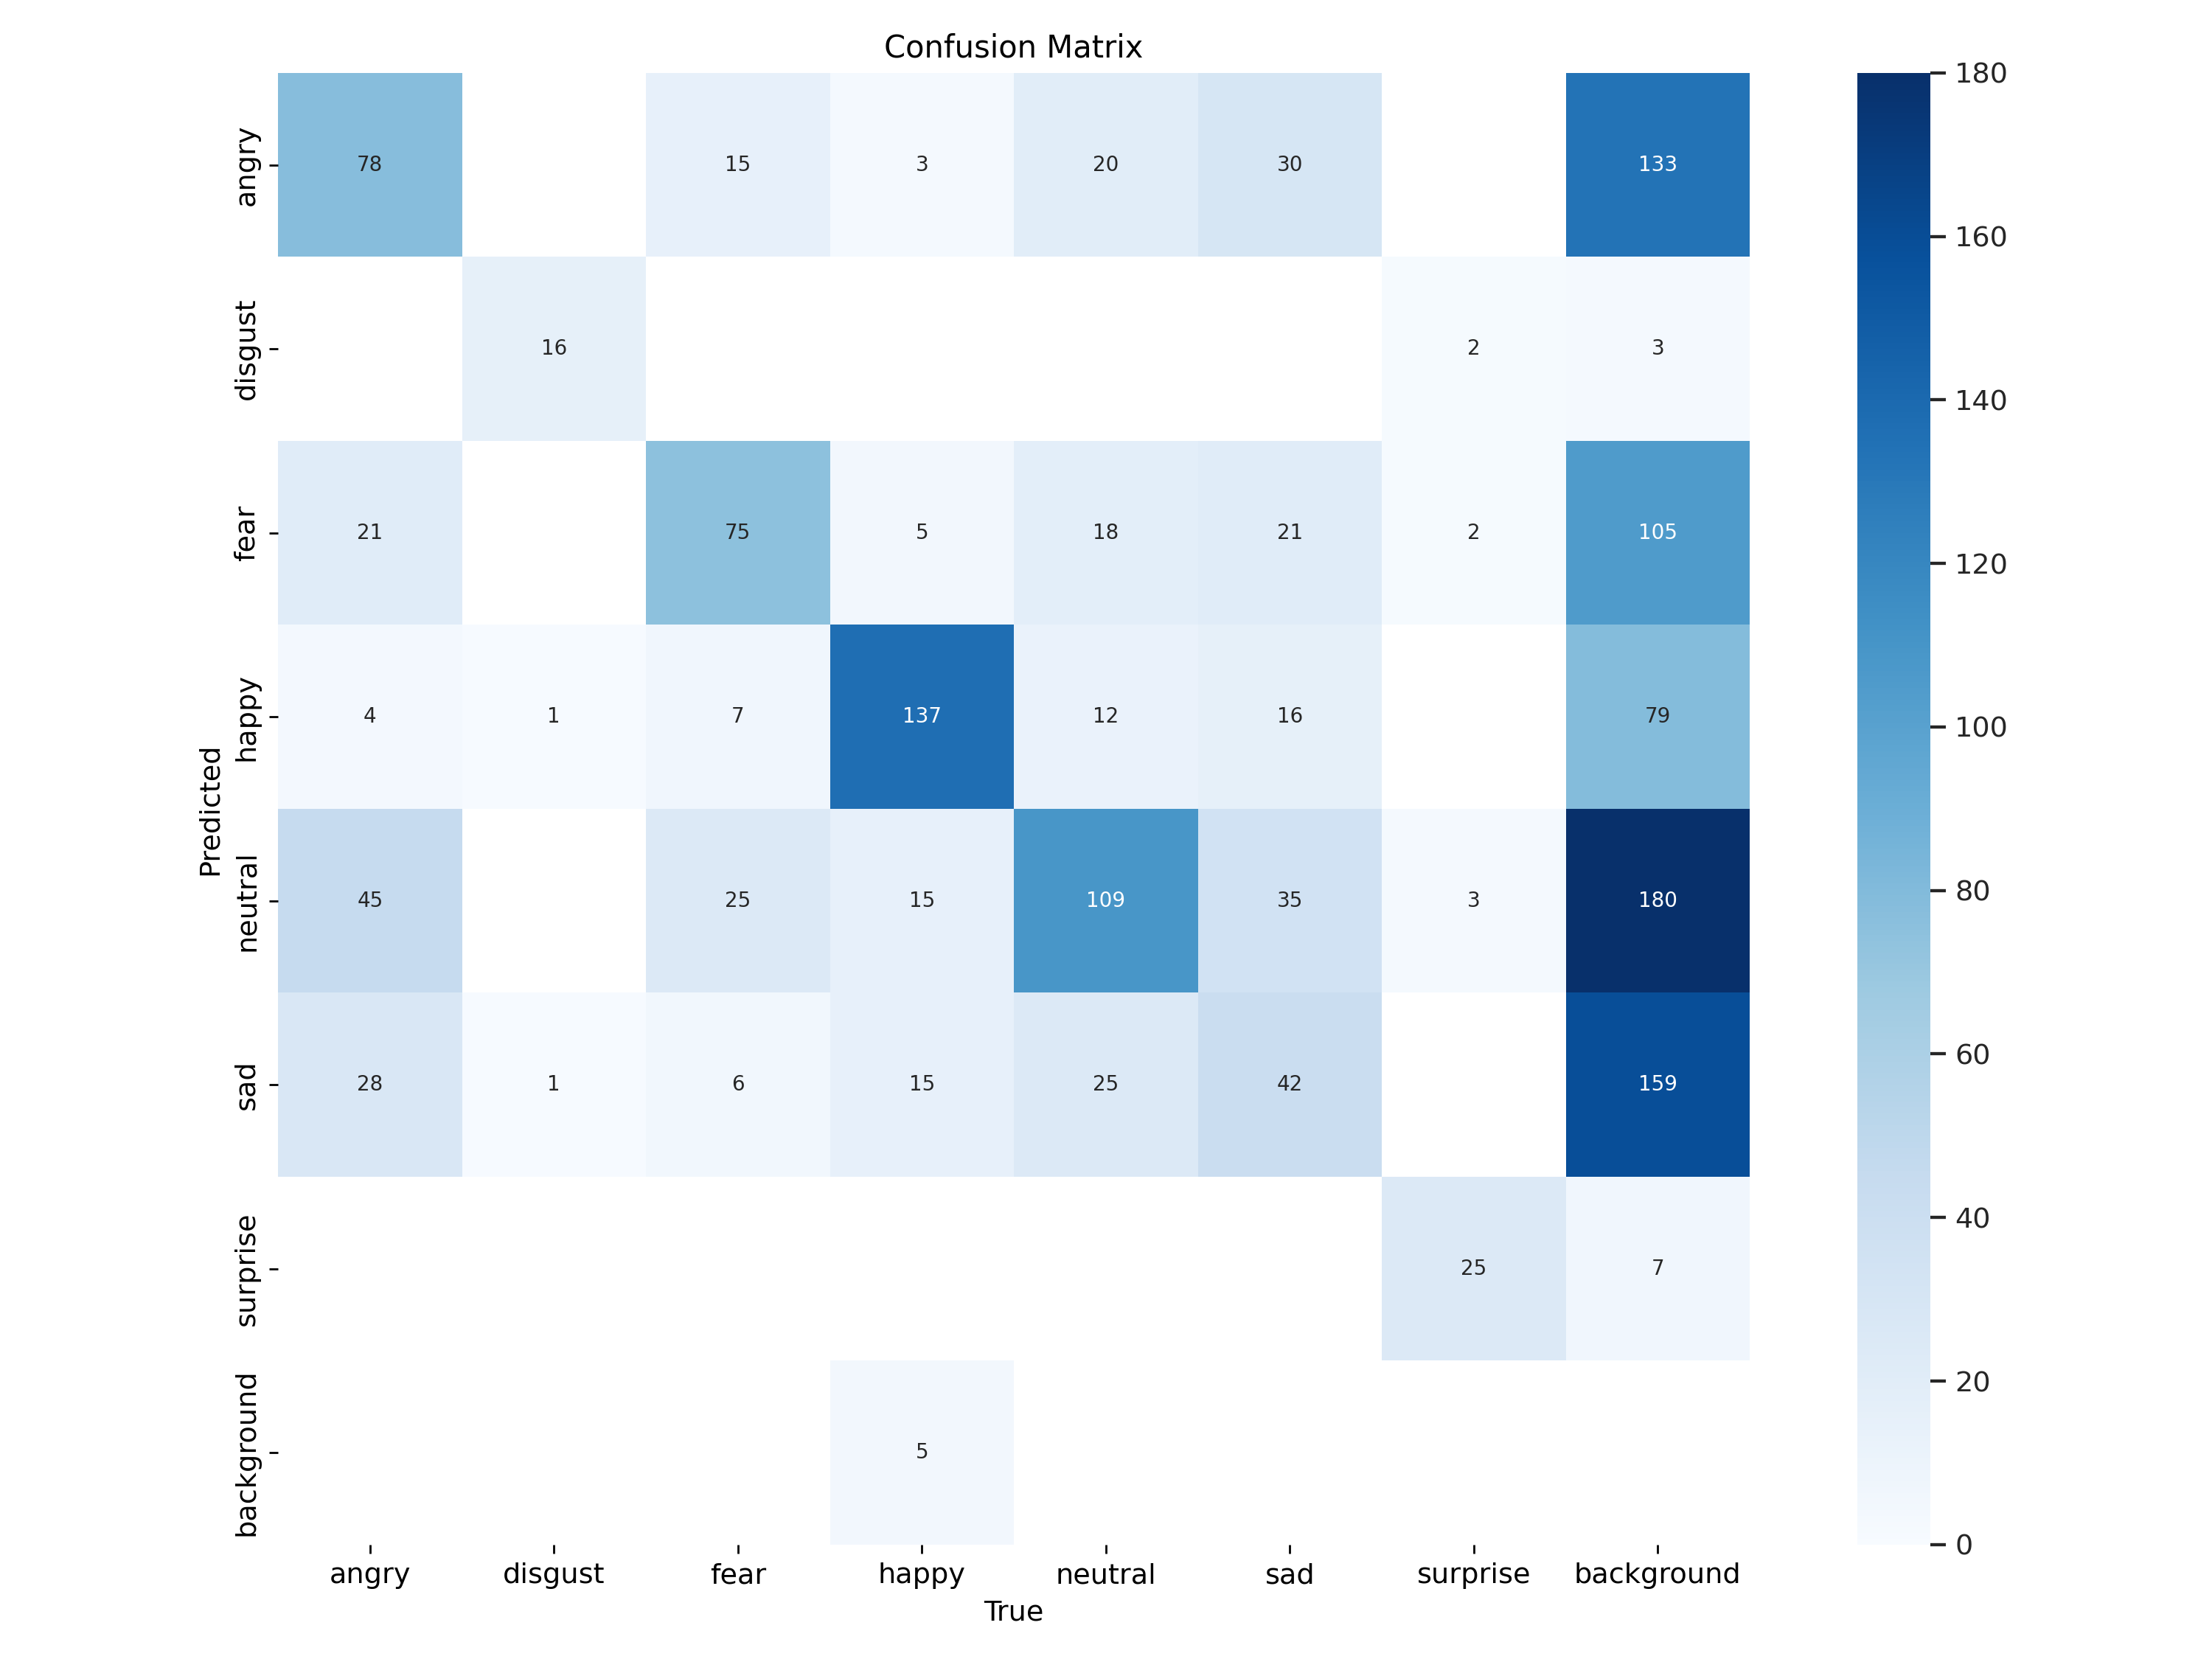

In [17]:
#examino los resultados
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

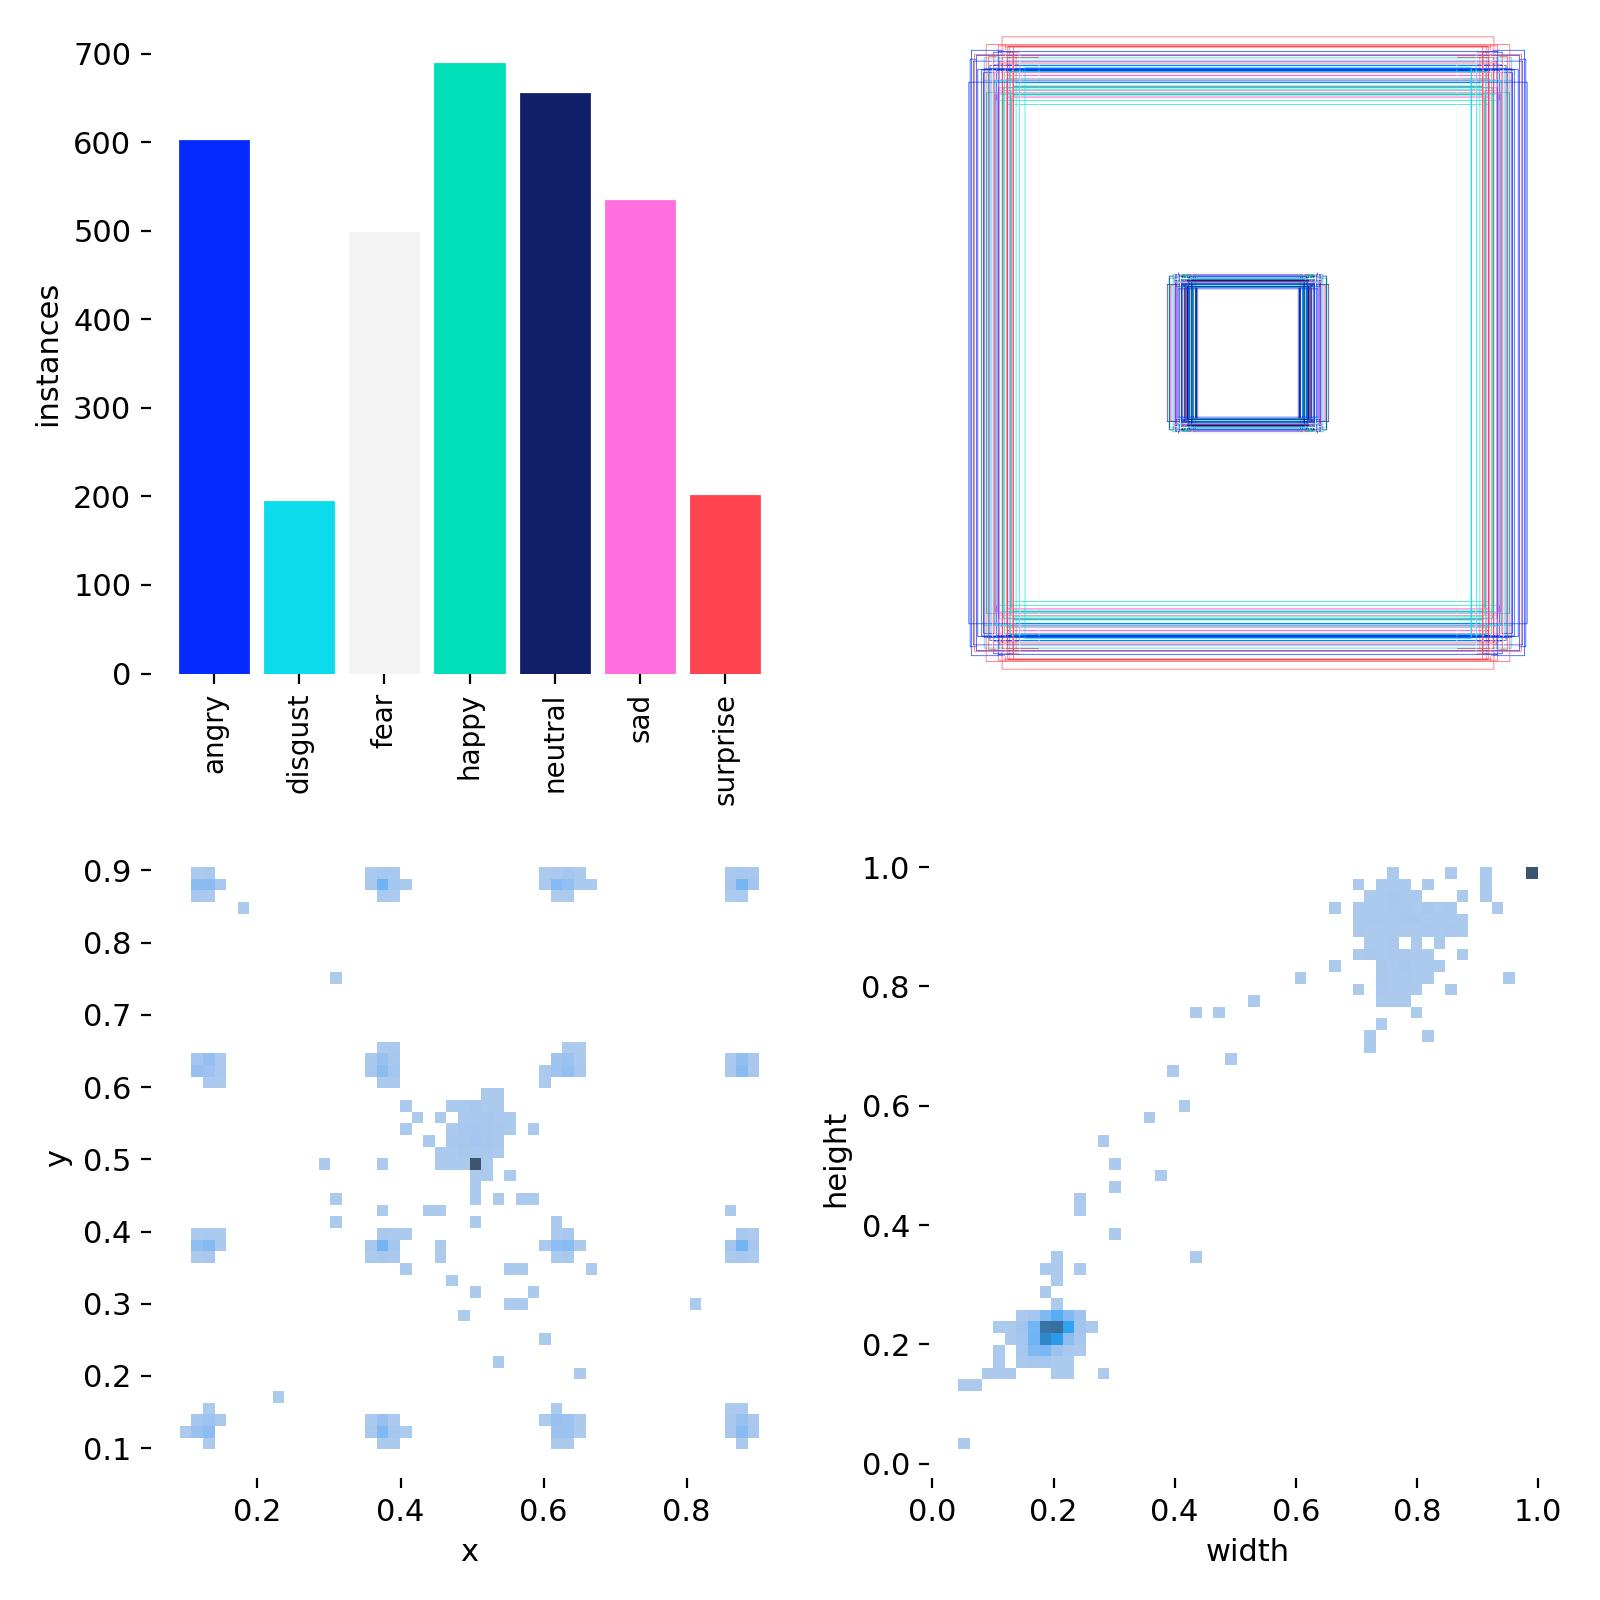

In [18]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

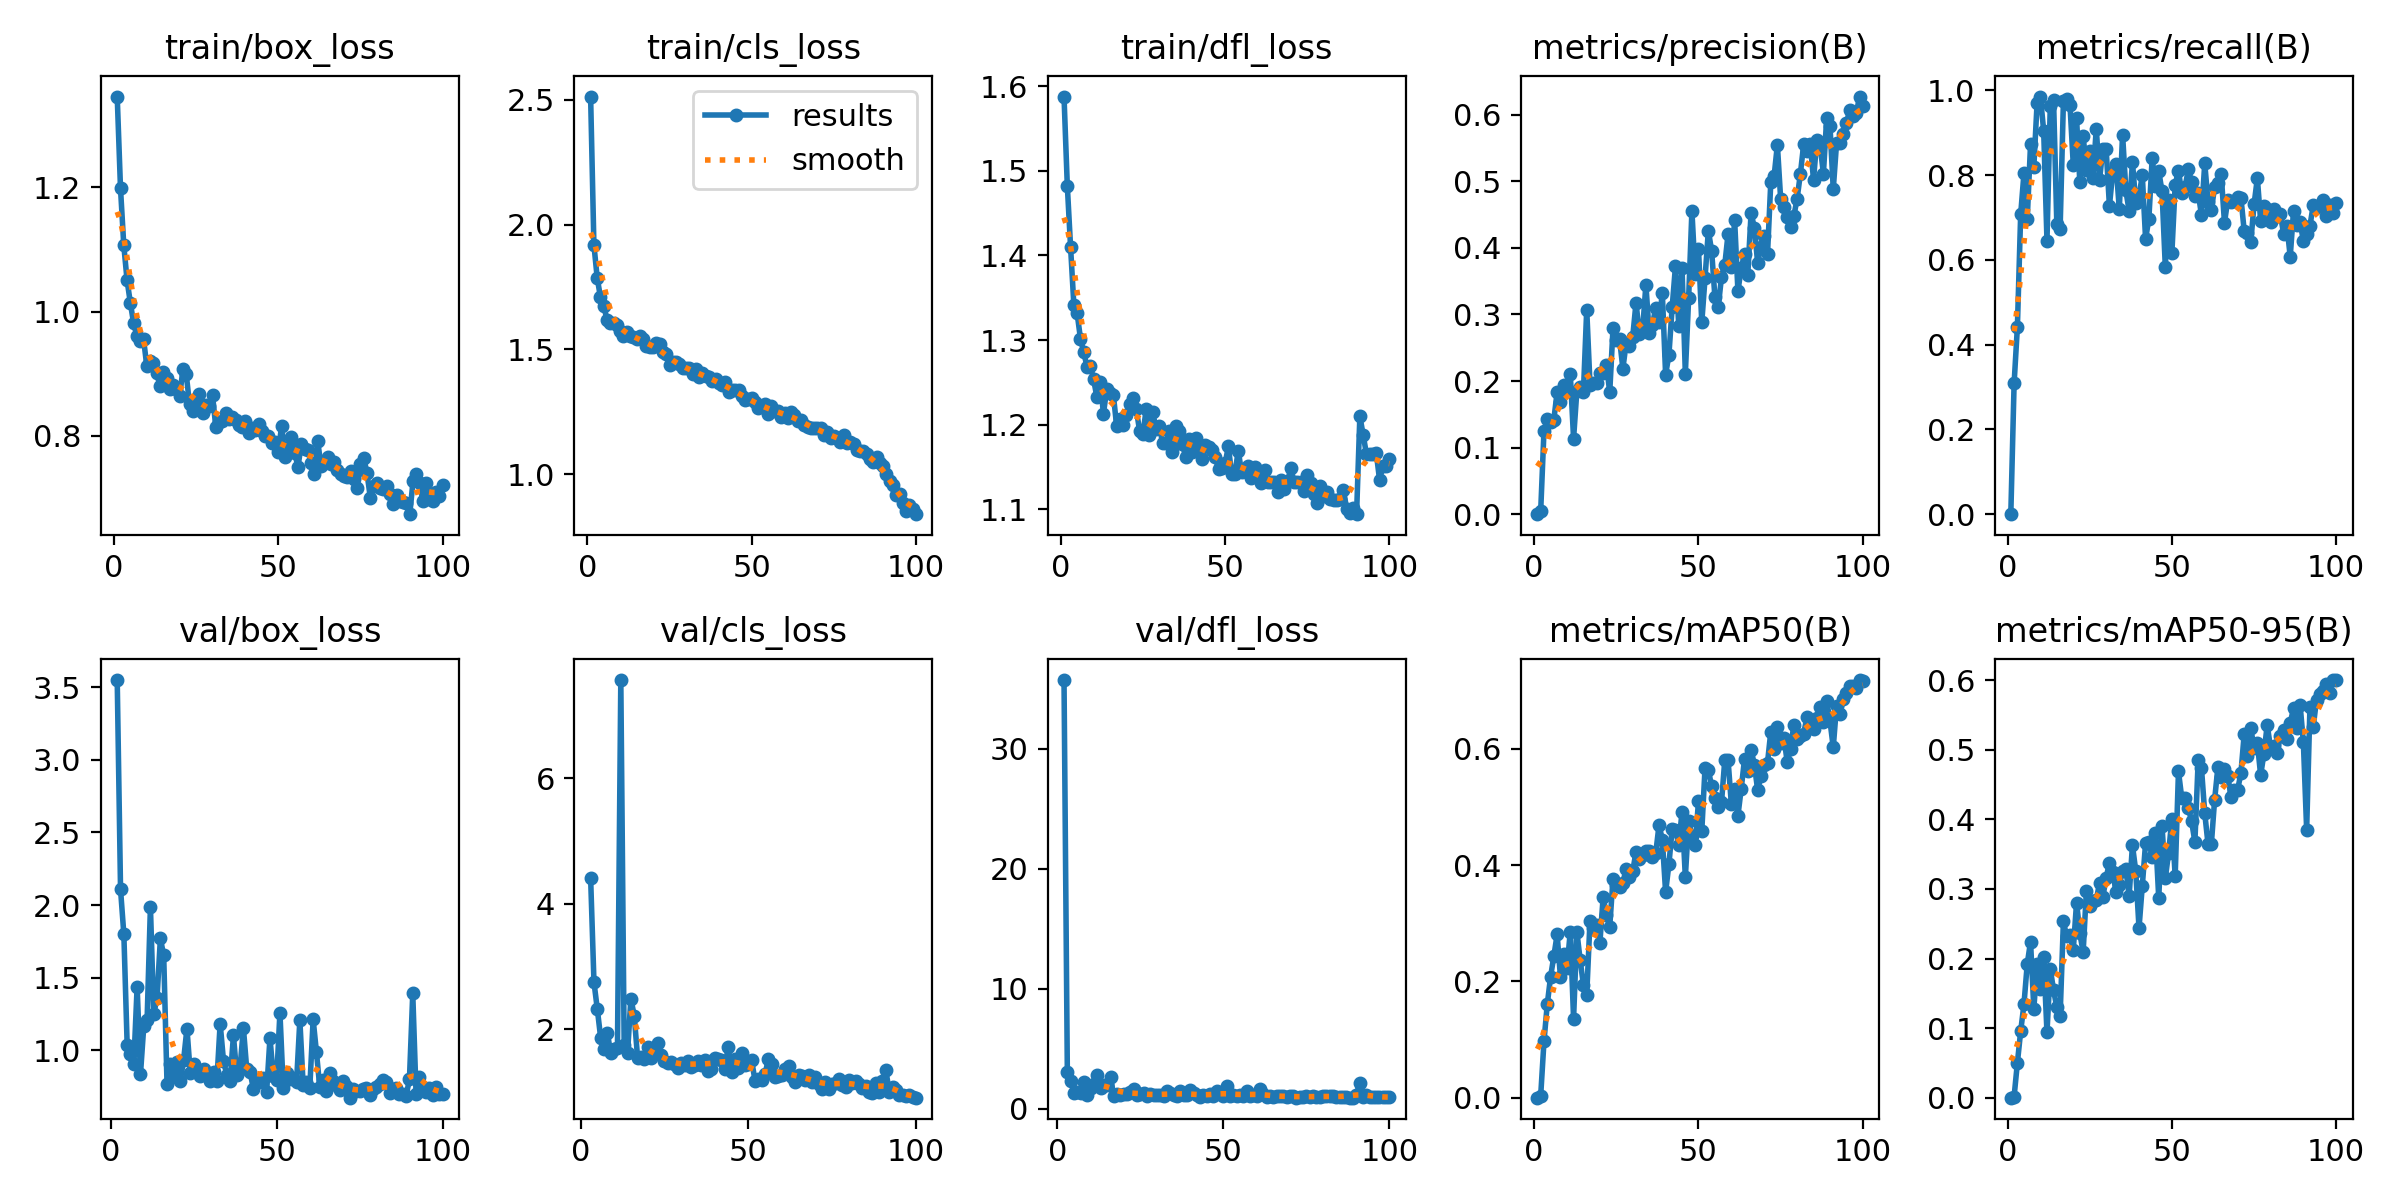

In [19]:
Image("/content/runs/detect/train2/results.png", width=600)

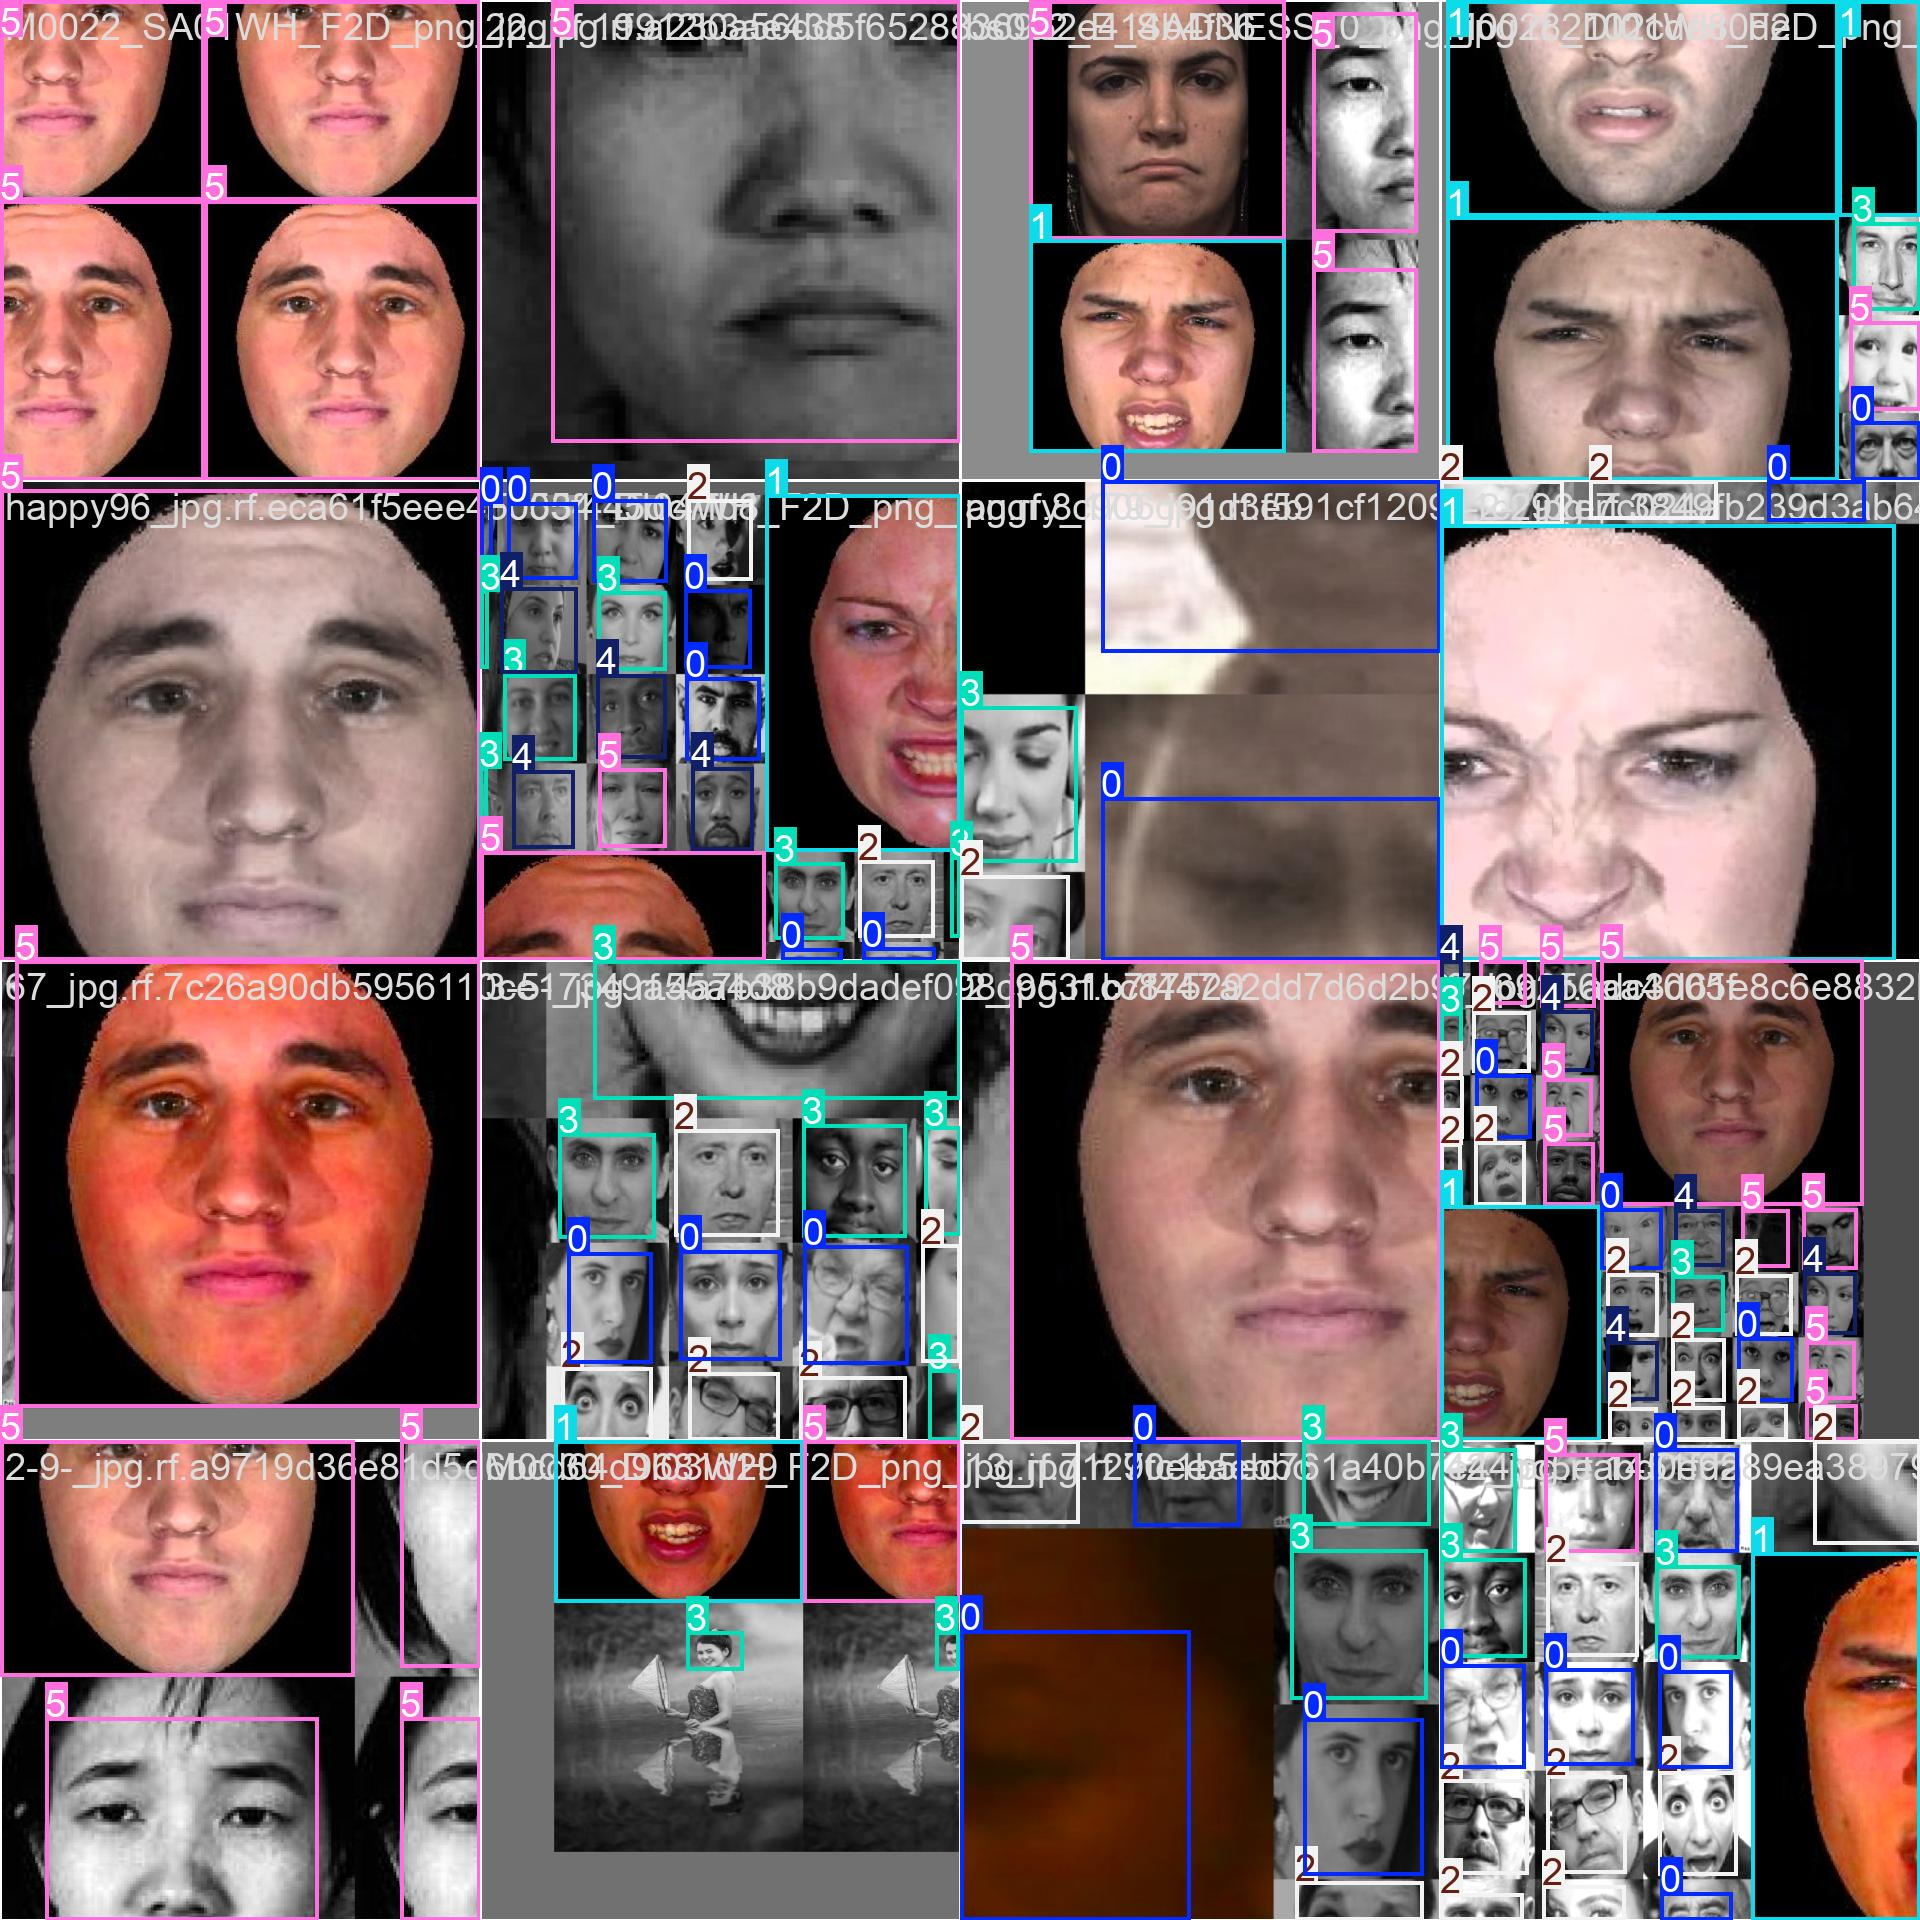

In [20]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

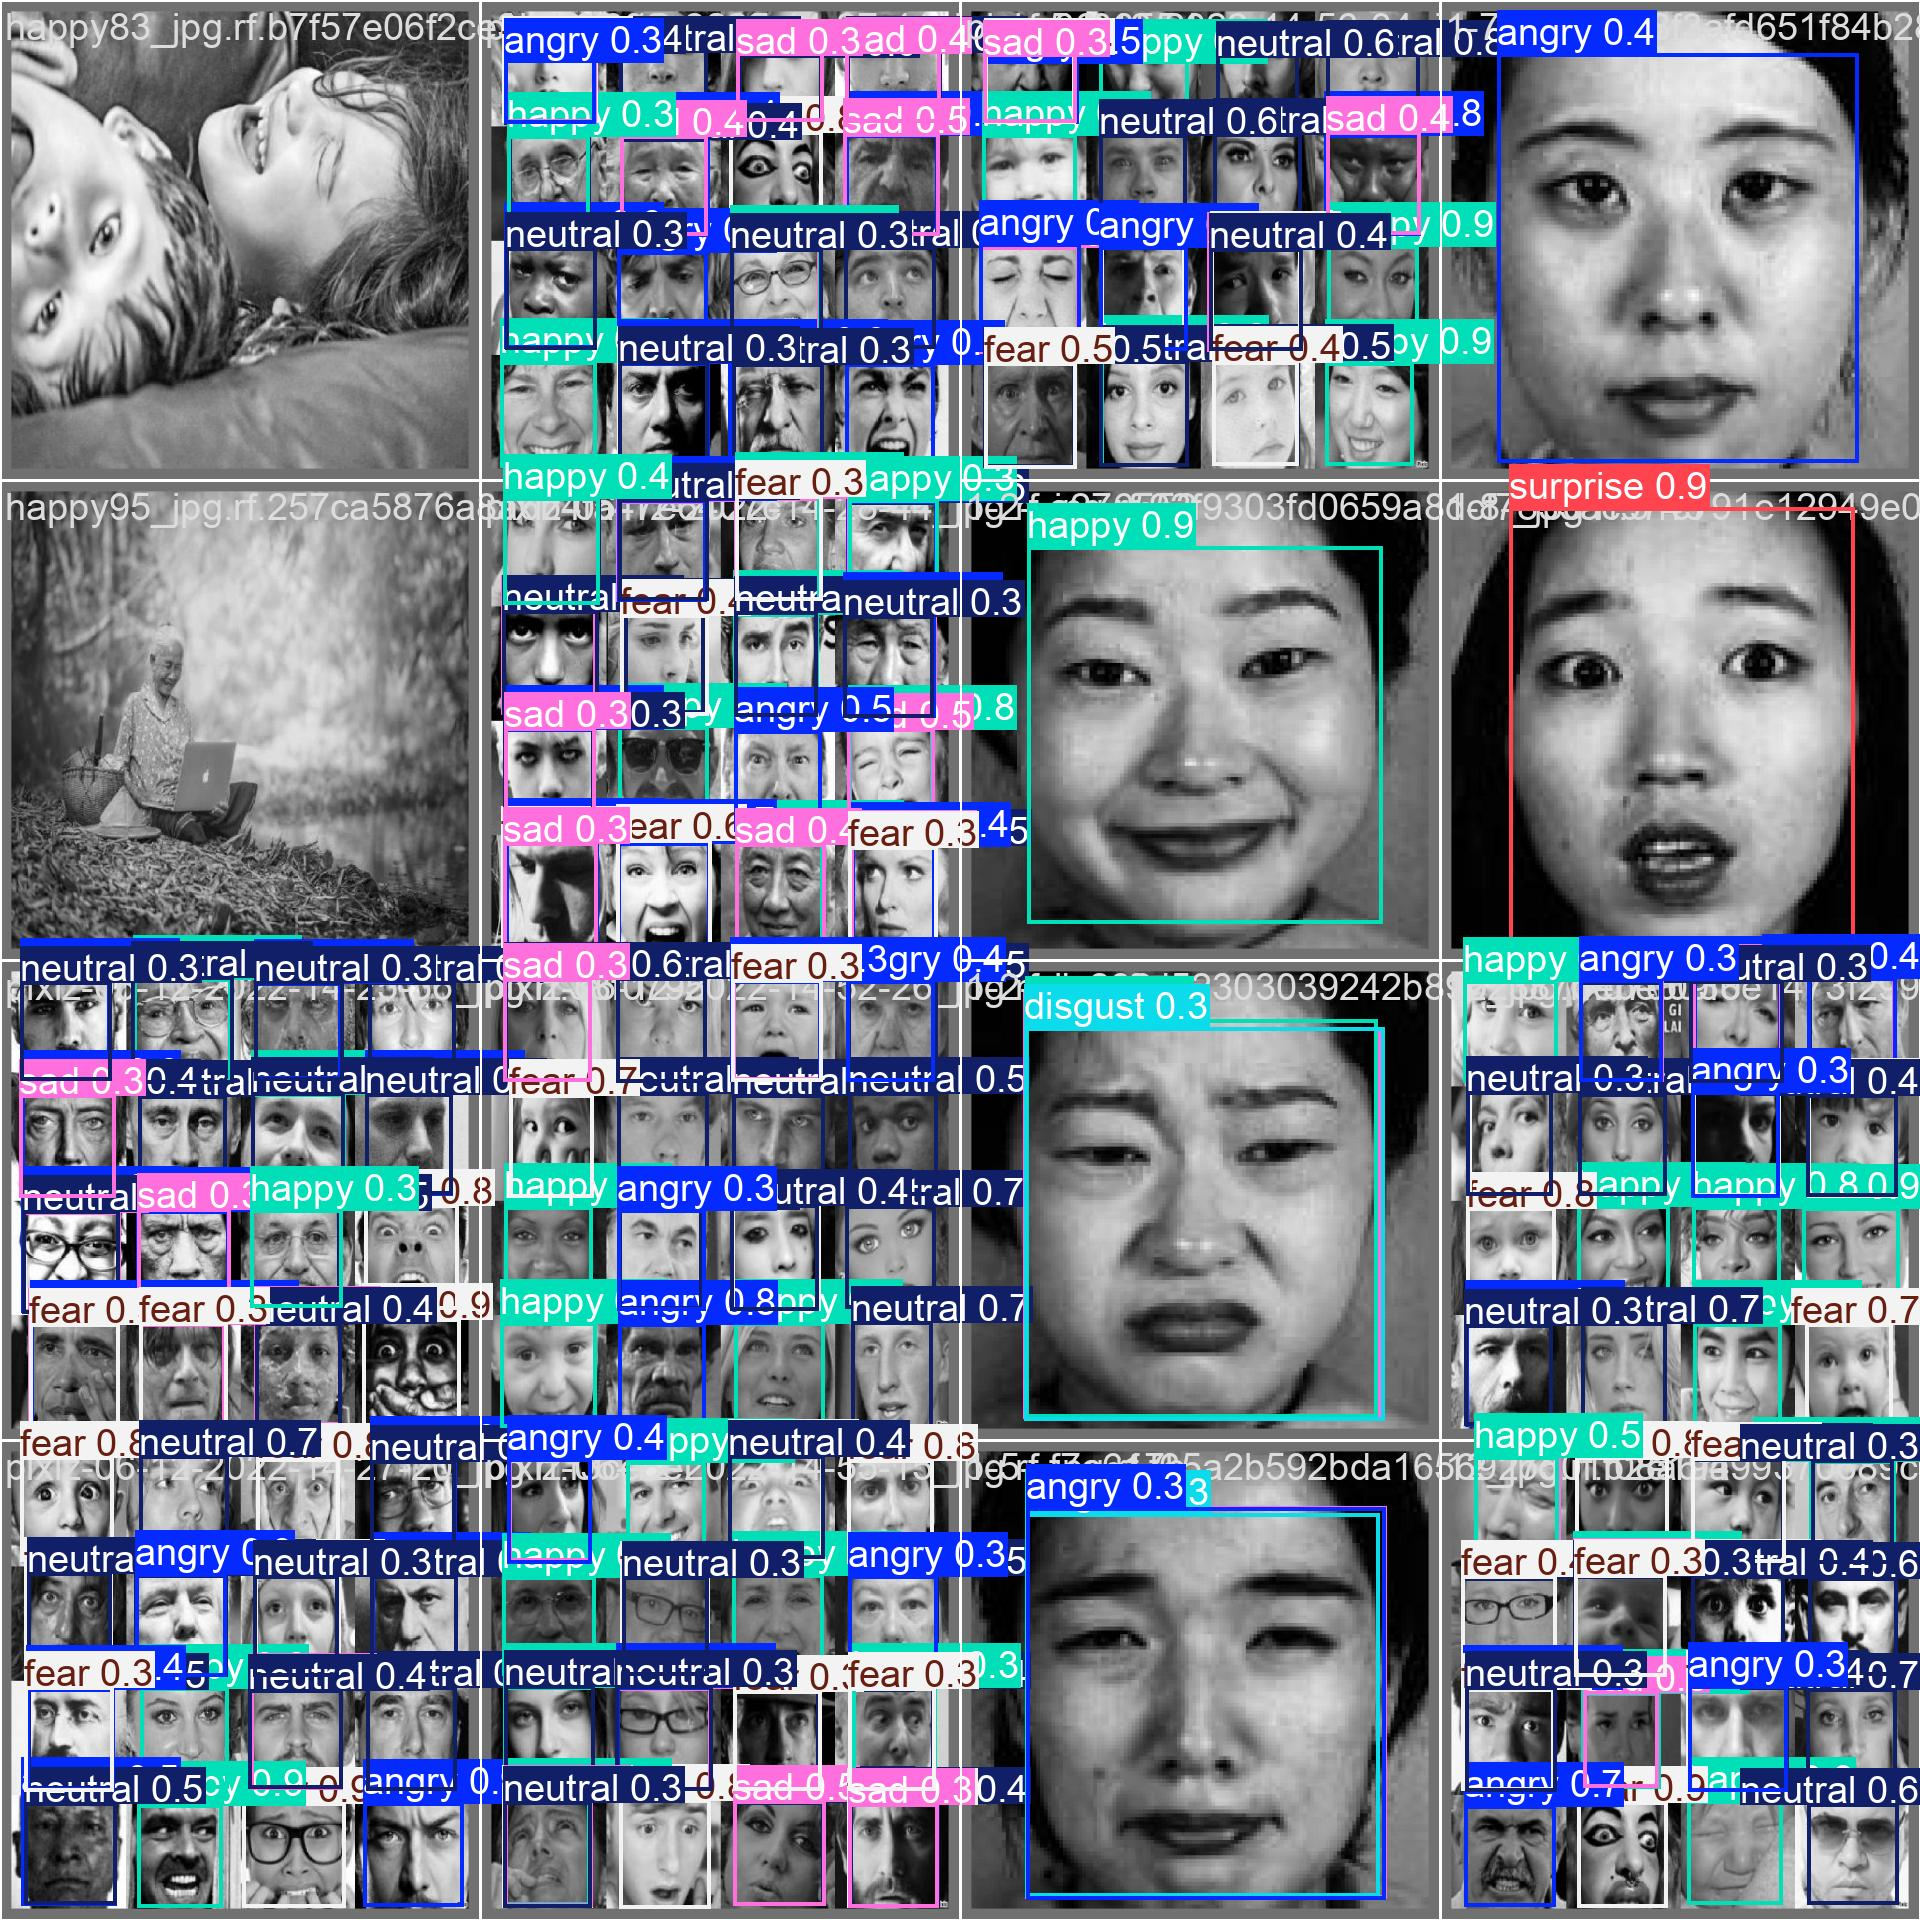

In [21]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

In [22]:
#Validamos y Fine-Tuned Model
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100% 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:06<00:00,  1.83it/s]
                   all        185        862      0.614      0.733      0.716        0.6
                 angry         76        176      0.491       0.58      0.567      0.429
               disgust         18         18      0.712      0.833      0.838      0.831
                  fear         51        128      0.567      0.747        0.7      0.534
                 happy         64        180      0.727      0.817      0.844      0.626
               neutral         52        184      0.472      0.778      0.625      0.471
                   sad         64   

In [23]:
#Inferencia
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 37.0ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 640x640 1 angry, 37.1ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 640x640 1 happy, 37.0ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 640x640 4 angrys, 3 fears, 4 happys, 8 neutrals, 5 sads, 37.0ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 640x640 3 angrys, 8 fears, 2 happys, 4 neutrals, 2 sads, 37.1ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734ebfffb7612bb0

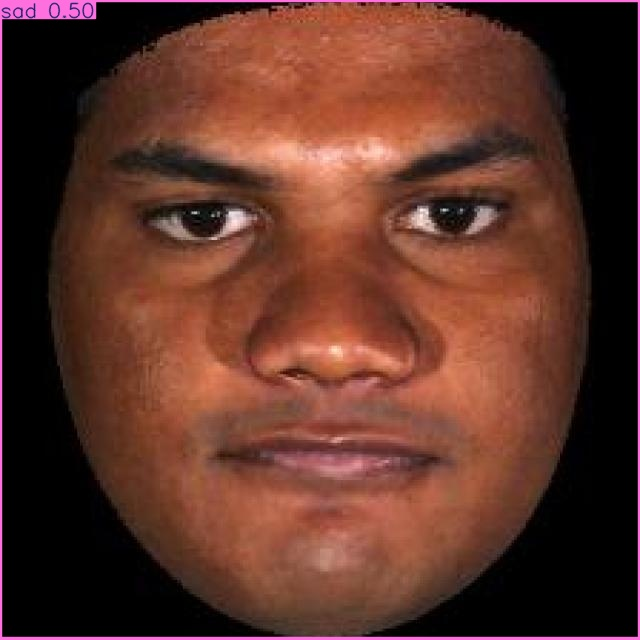

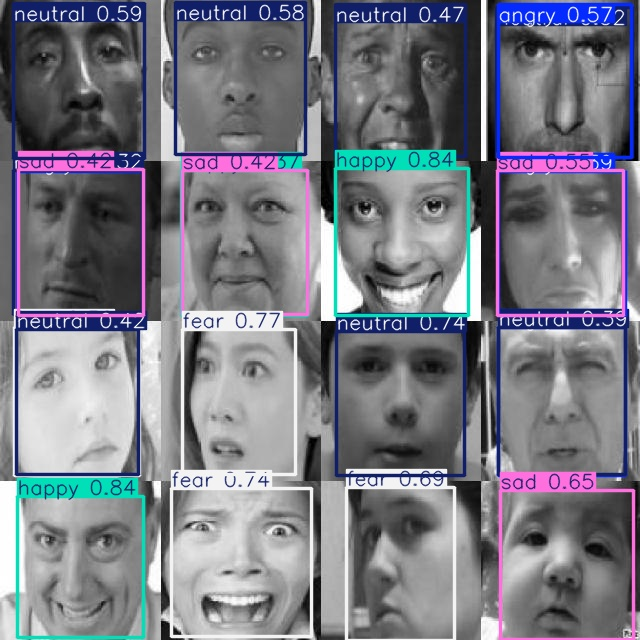

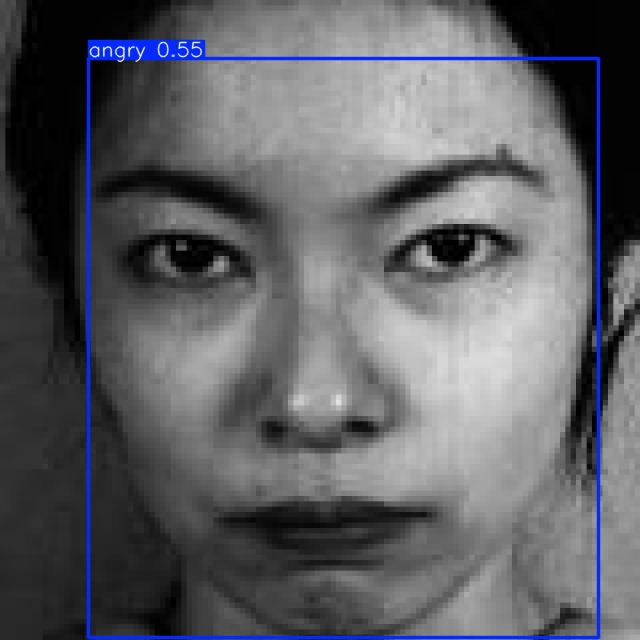

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")